# Capacity utilization

## Importing packages

In [0]:
import pandas as pd
import pandas_datareader.data as web
from datetime import datetime
import statsmodels.api as sm
import numpy as np
import plotly.tools as tls
from plotly.offline import init_notebook_mode, iplot
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('paper')
plt.style.use("seaborn-white")
%matplotlib inline
%config InlineBackend.figure_format='retina'

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Defining start date

In [0]:
start = datetime(1960,1,1)

## Data for recessions

In [0]:
recessions = pd.read_html('https://www.nber.org/cycles/cyclesmain.html')

peak = recessions[0][0][4]
peak = peak.replace('(I)', '/')
peak = peak.replace('(II)', '/')
peak = peak.replace('(III)', '/')
peak = peak.replace('(IV)', '/')
peak = peak.split('/ ')
peak[-1] = peak[-1].replace(" /", "")
peak = [datetime.strptime(i, '%B %Y') for i in peak]
peak = peak[-8:]

trough = recessions[0][1][4]
trough = trough.replace('(I)', '/')
trough = trough.replace('(II)', '/')
trough = trough.replace('(III)', '/')
trough = trough.replace('(IV)', '/')
trough = trough.replace('March 1991/  November 2001', 'March 1991 / November 2001', )
trough = trough.split(' / ')
trough[-1] = trough[-1].replace(" /", "")
trough = [datetime.strptime(i, '%B %Y') for i in trough[1:]]
trough = trough[-8:]

crisis = pd.DataFrame({'peak': peak, 'trough': trough})

In [0]:
df = web.DataReader(name = 'TCU', data_source="fred", start=start)
df.columns = ['Total industry capacity utilization']
df.index.name = "Date"
df = df.apply(lambda x: x/100)
df.head()

,Total industry capacity utilization
Date,
1967-01-01,0.893902
1967-02-01,0.879750
1967-03-01,0.870835
1967-04-01,0.875089
1967-05-01,0.863566


## HP Filter

In [0]:
cycle, trend = sm.tsa.filters.hpfilter(df, 1600)
cycle.columns = ["Cycle"]
trend.columns = ["HP Filter"]

In [0]:
cycle.head()

,Cycle
Date,
1967-01-01,0.021445
1967-02-01,0.007497
1967-03-01,-0.001228
1967-04-01,0.003186
1967-05-01,-0.008227


In [0]:
trend.head()

,HP Filter
Date,
1967-01-01,0.872457
1967-02-01,0.872253
1967-03-01,0.872063
1967-04-01,0.871903
1967-05-01,0.871793


In [0]:
df = pd.concat([df, cycle, trend], axis = 1, join_axes=[df.index])
df.head()

,Total industry capacity utilization,Cycle,HP Filter
Date,,,
1967-01-01,0.893902,0.021445,0.872457
1967-02-01,0.879750,0.007497,0.872253
1967-03-01,0.870835,-0.001228,0.872063
1967-04-01,0.875089,0.003186,0.871903
1967-05-01,0.863566,-0.008227,0.871793


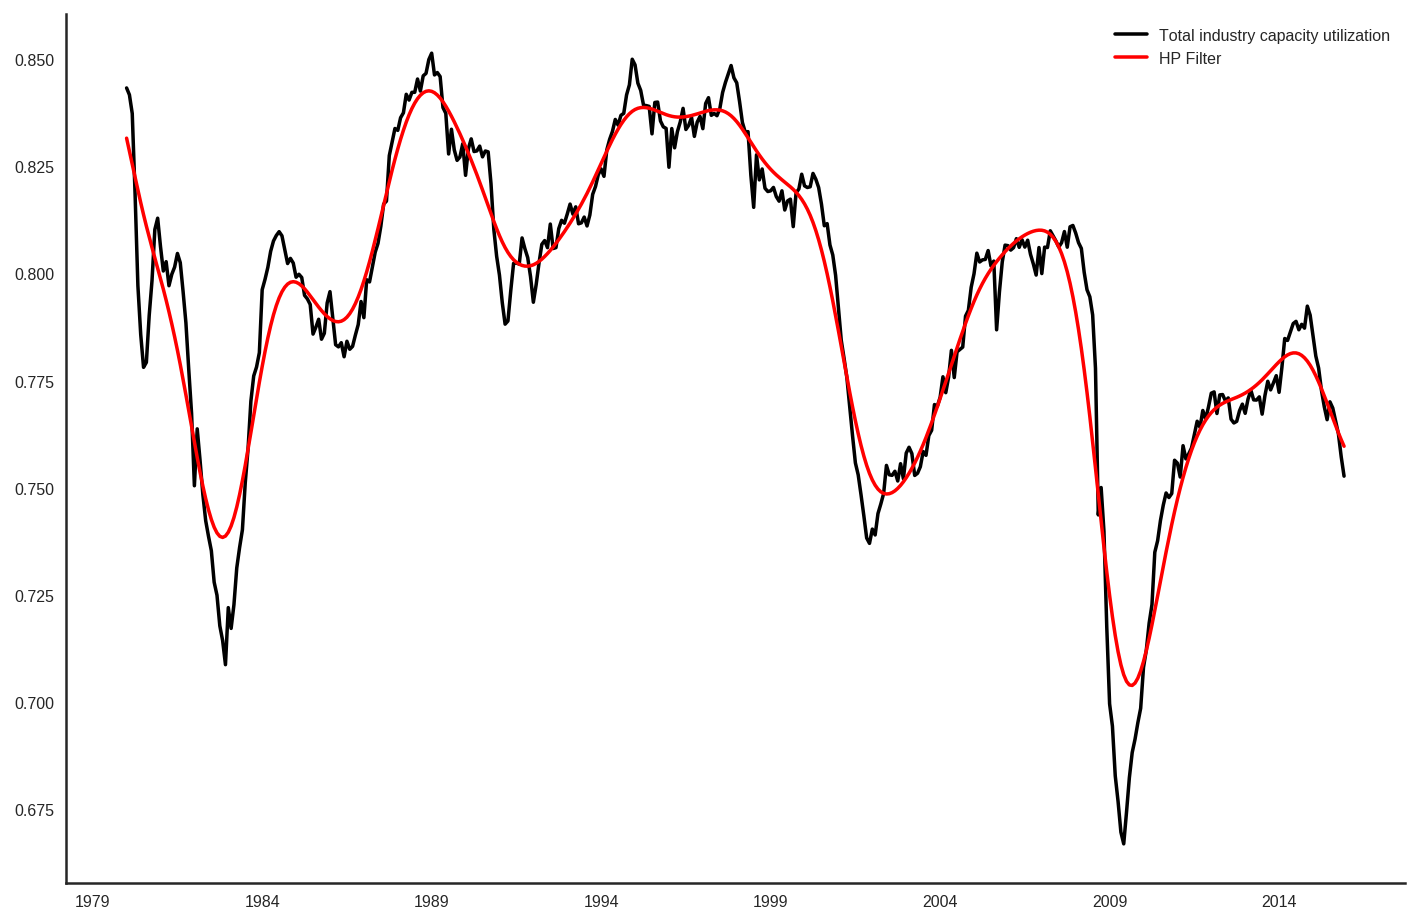

In [15]:
ax = df[["Total industry capacity utilization", "HP Filter"]]["1980":"2015"].plot(color = ("black", "red"), lw = 1.75, figsize = (12,8))
ax.set_xlabel("")
sns.despine()
plt.show()

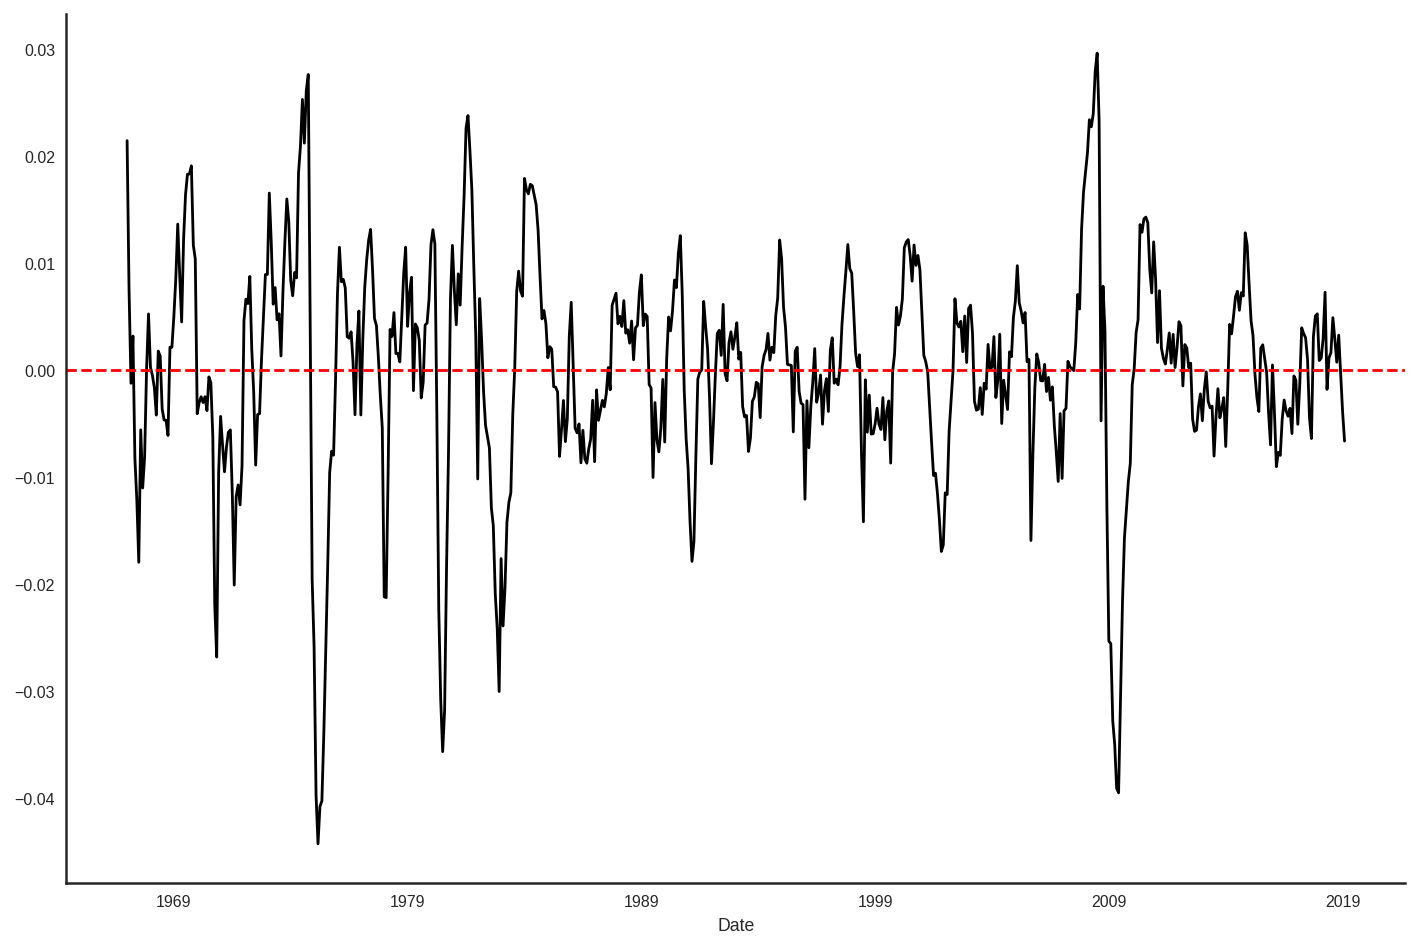

In [0]:
ax = df["Cycle"].plot(color = "black", figsize = (12,8))
ax.axhline(y = df["Cycle"].mean(), color = "red", ls = "--")
sns.despine()
plt.show()